<a href="https://colab.research.google.com/github/dev-69/MajorProject/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Best Performers for Undersampling ---
Best overall: TF-IDF with RUS using Logistic Regression (AUC: 66.53%)
Best for TF-IDF: RUS using Logistic Regression (AUC: 66.53%)
Best for FastText: RUS using Random Forest (AUC: 63.67%)
Best for Word2Vec: RUS using Random Forest (AUC: 65.43%)

--- Best Performers for Oversampling ---
Best overall: TF-IDF with ROS using Logistic Regression (AUC: 66.72%)
Best for TF-IDF: ROS using Logistic Regression (AUC: 66.72%)
Best for FastText: ROS using Gradient Boost (AUC: 63.53%)
Best for Word2Vec: SMOTE using Logistic Regression (AUC: 66.03%)

--- Best Performers for Hybrid ---
Best overall: TF-IDF with RUS+ADASYN using Gradient Boost (AUC: 67.21%)
Best for TF-IDF: RUS+ADASYN using Gradient Boost (AUC: 67.21%)
Best for FastText: RUS+SMOTE using Gradient Boost (AUC: 64.29%)
Best for Word2Vec: RUS+ADASYN using Random Forest (AUC: 66.12%)


<ipython-input-1-e647f0e4713c>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Vectorizer', y='AUC', data=undersampling_best, palette='Blues_d')
<ipython-input-1-e647f0e4713c>:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Vectorizer', y='AUC', data=oversampling_best, palette='Greens_d')
<ipython-input-1-e647f0e4713c>:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(x='Vectorizer', y='AUC', data=hybrid_best, palette='Reds_d')


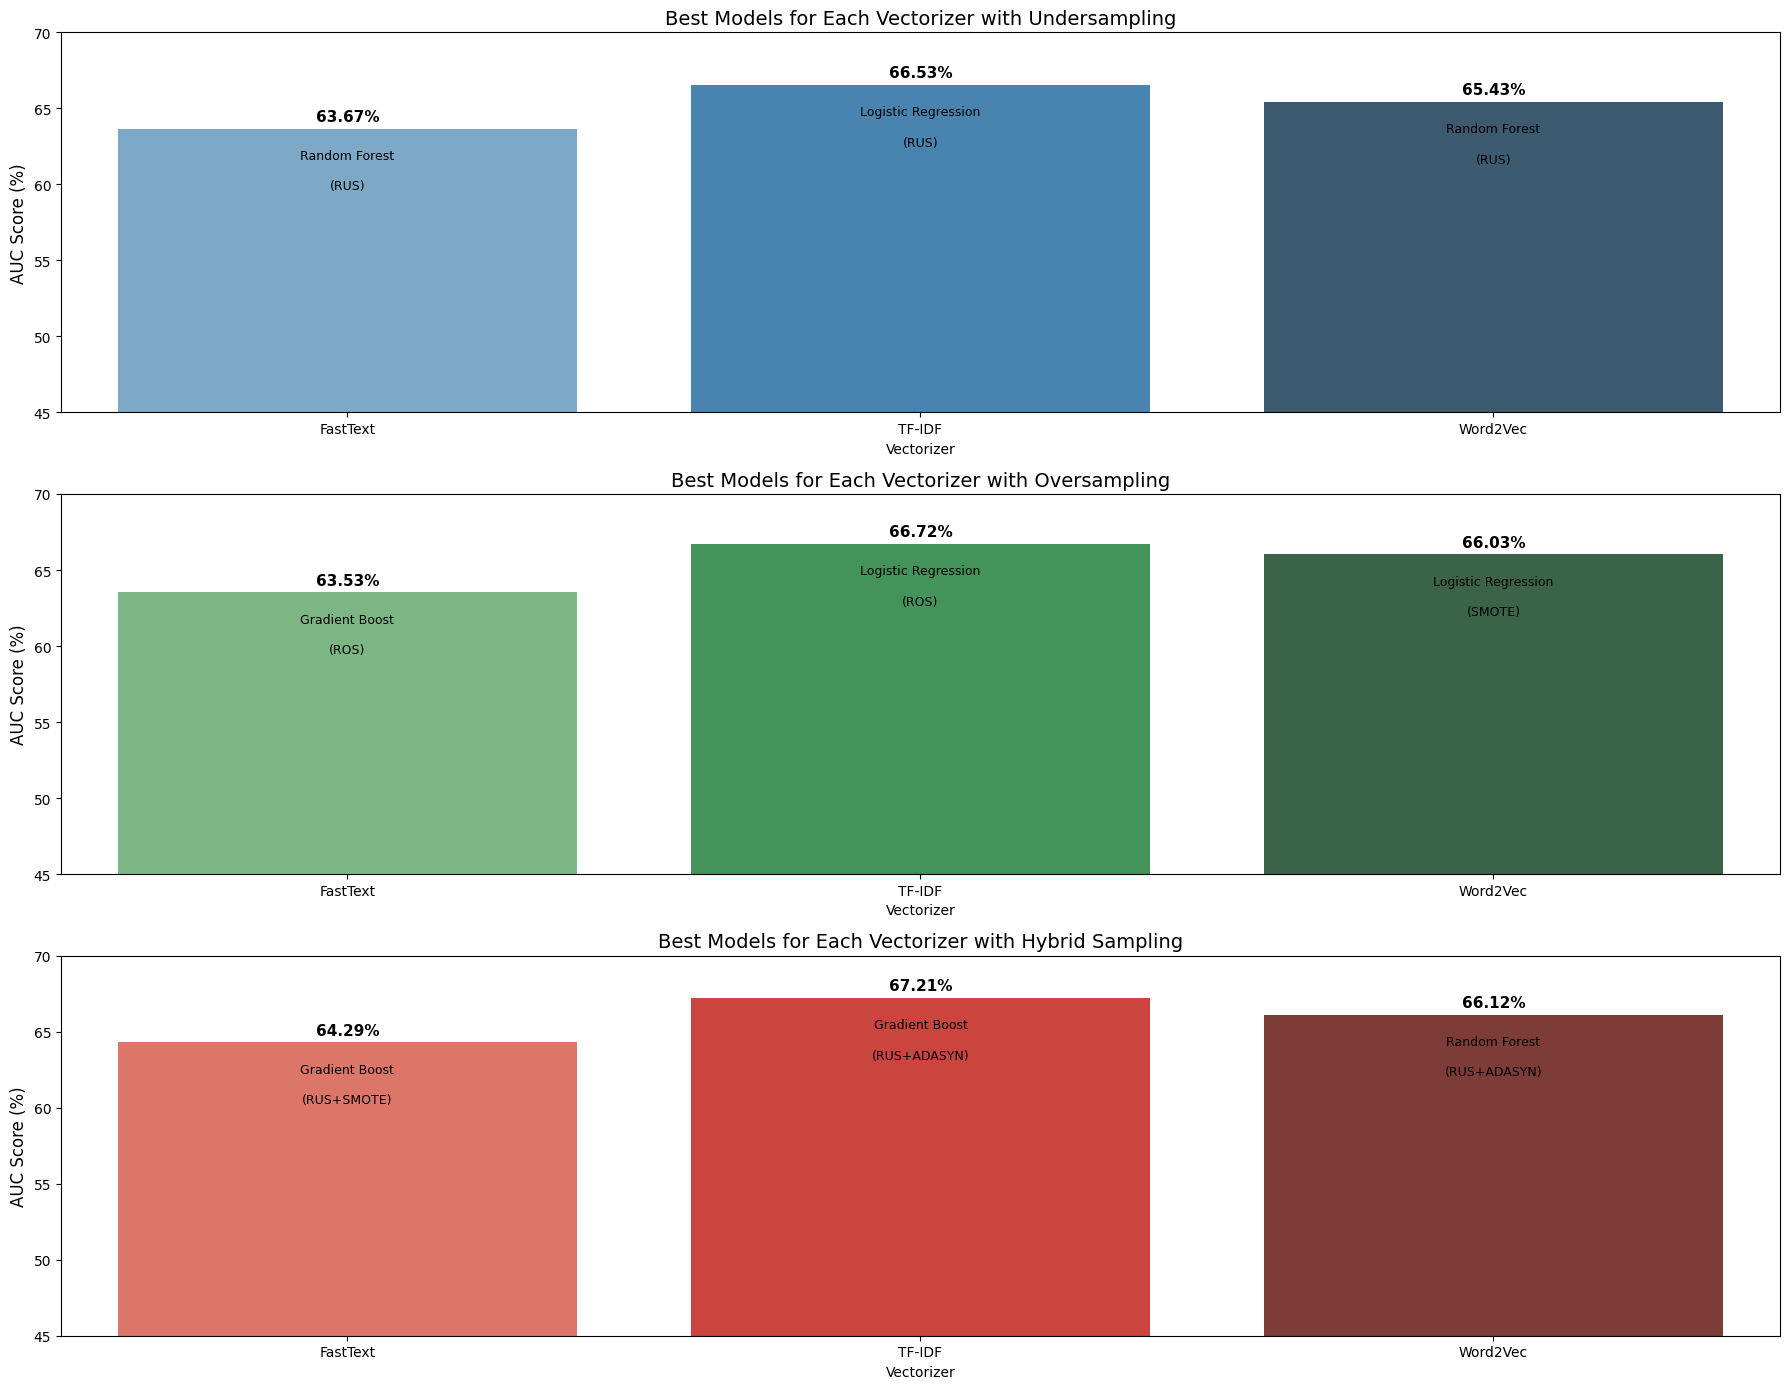

<ipython-input-1-e647f0e4713c>:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax4 = sns.barplot(x='Category', y='AUC', data=overall_best, palette='viridis')


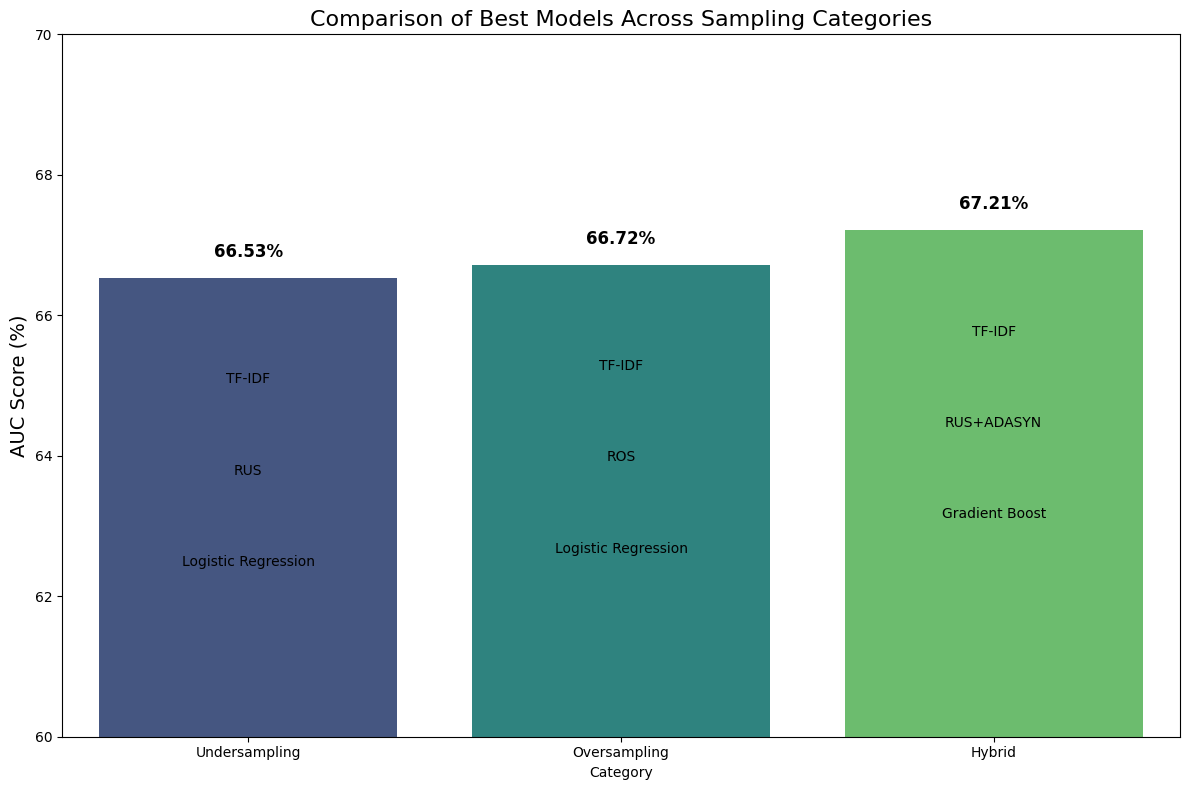

<ipython-input-1-e647f0e4713c>:195: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Category', y='AUC', data=vec_comparison,


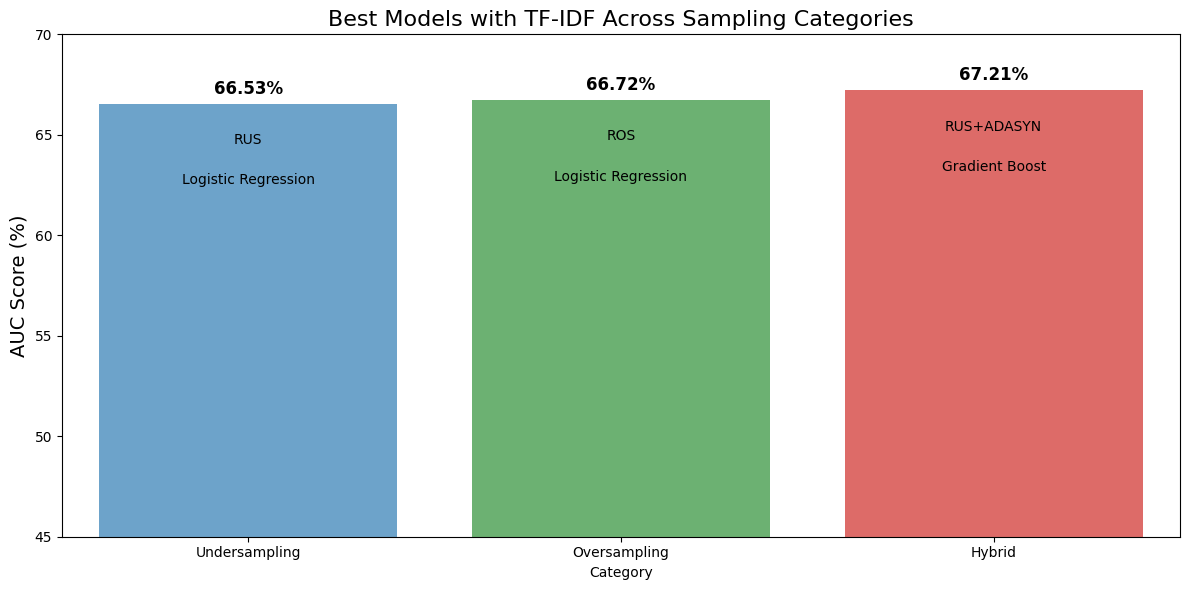

<ipython-input-1-e647f0e4713c>:195: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Category', y='AUC', data=vec_comparison,


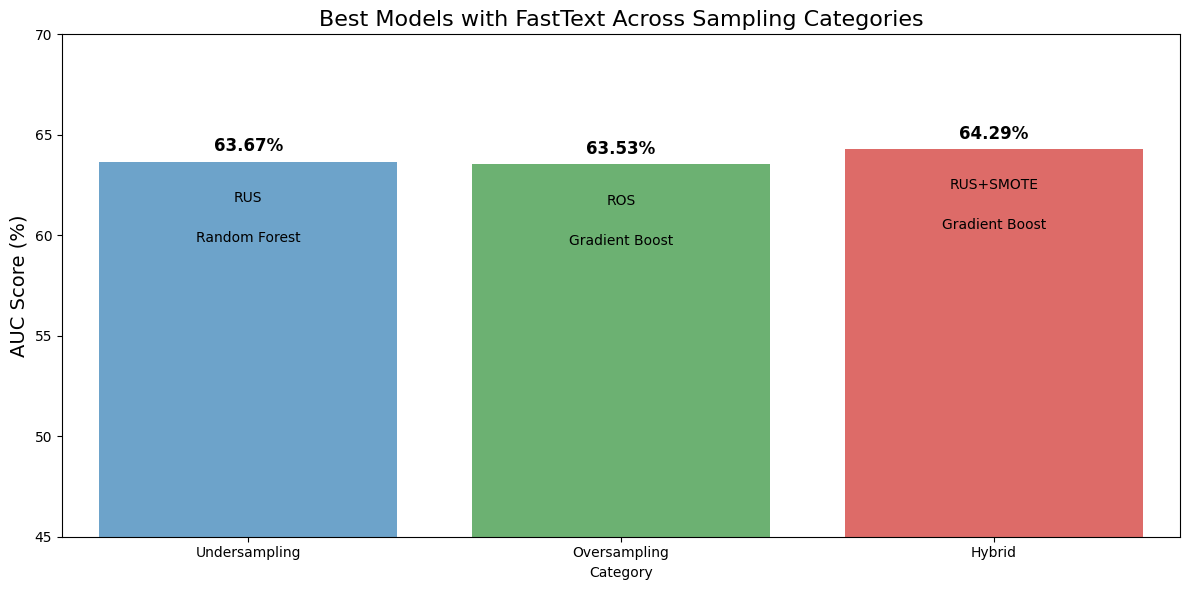

<ipython-input-1-e647f0e4713c>:195: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Category', y='AUC', data=vec_comparison,


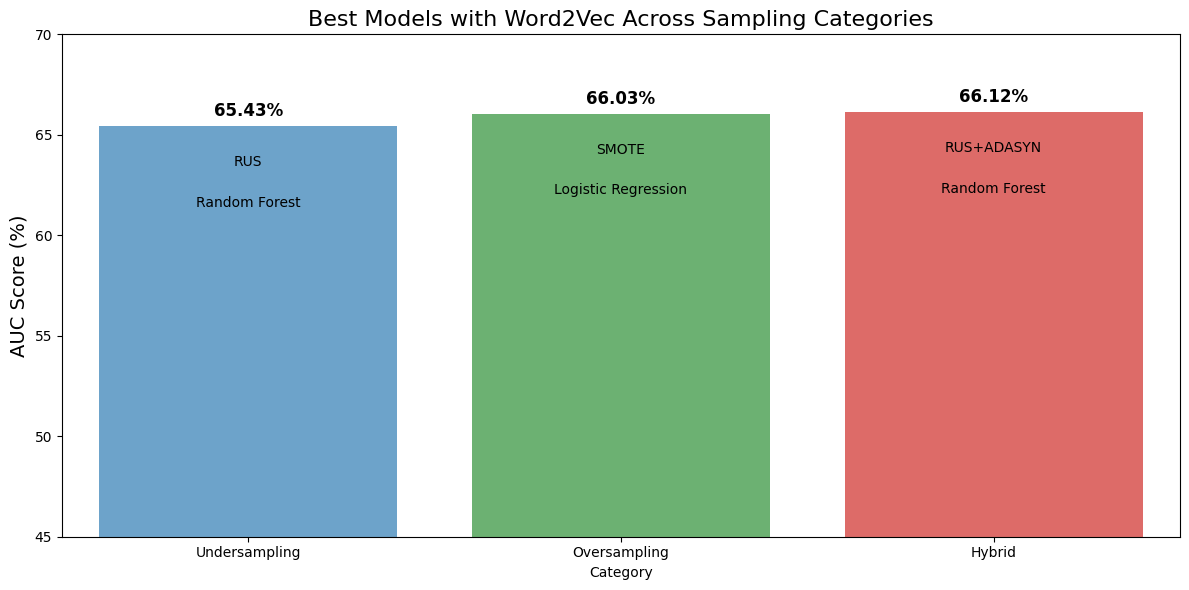

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataframes from the provided data
# Undersampling data
undersampling_data = {
    'Vectorizer': ['TF-IDF']*18 + ['FastText']*18 + ['Word2Vec']*18,
    'Sampling': ['RUS']*6 + ['NearMiss']*6 + ['TomekLink']*6 +
                ['RUS']*6 + ['NearMiss']*6 + ['TomekLink']*6 +
                ['RUS']*6 + ['NearMiss']*6 + ['TomekLink']*6,
    'Model': ['K-Neighbours', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boost', 'Logistic Regression'] * 9,
    'AUC': [57.79, 56.18, 66.4, 64.86, 65.42, 66.53,
            55.14, 52.44, 52.98, 53.34, 52.76, 53.17,
            52, 51.5, 50, 50.08, 50.33, 50,
            54.9, 54.63, 63.67, 62.39, 62.85, 56.56,
            51.15, 50.76, 50.86, 50.29, 49.82, 51.69,
            50.88, 49.59, 49.99, 50, 49.91, 50,
            59.01, 55.78, 65.43, 64.02, 65.16, 63.43,
            50.07, 51.67, 52.37, 51.76, 51.75, 53.25,
            50.86, 51.41, 50, 50, 50, 50]
}

# Oversampling data
oversampling_data = {
    'Vectorizer': ['TF-IDF']*18 + ['FastText']*18 + ['Word2Vec']*18,
    'Sampling': ['ROS']*6 + ['SMOTE']*6 + ['ADASYN']*6 +
                ['ROS']*6 + ['SMOTE']*6 + ['ADASYN']*6 +
                ['ROS']*6 + ['SMOTE']*6 + ['ADASYN']*6,
    'Model': ['K-Neighbours', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boost', 'Logistic Regression'] * 9,
    'AUC': [55.87, 56.38, 50.08, 65.59, 64.7, 66.72,
            53.55, 53.58, 51.12, 57.93, 52.17, 64.86,
            53.78, 53.6, 51.02, 56.73, 51.52, 63.71,
            52.33, 57.13, 50, 62.66, 63.53, 60.79,
            56.76, 56.03, 53.3, 62.17, 61.29, 61.22,
            56.77, 60.53, 53.38, 62.35, 62.06, 61.3,
            53.53, 57.26, 50.07, 63.89, 65.92, 64.9,
            59.47, 57.34, 52.48, 64.39, 63.47, 66.03,
            59.13, 57.67, 52.25, 64.38, 62.19, 65.91]
}

# Hybrid data
# Fix the typo in the AdaBoost score for FastText with RUS+SMOTE
hybrid_data = {
    'Vectorizer': ['TF-IDF']*18 + ['FastText']*18 + ['Word2Vec']*18,
    'Sampling': ['RUS+ROS']*6 + ['RUS+SMOTE']*6 + ['RUS+ADASYN']*6 +
                ['RUS+ROS']*6 + ['RUS+SMOTE']*6 + ['RUS+ADASYN']*6 +
                ['RUS+ROS']*6 + ['RUS+SMOTE']*6 + ['RUS+ADASYN']*6,
    'Model': ['K-Neighbours', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boost', 'Logistic Regression'] * 9,
    'AUC': [61.08, 58.77, 66.47, 63.04, 66.35, 65.5,
            58.65, 57.31, 66, 63.62, 64.42, 66.39,
            59.98, 56.24, 65.76, 65.13, 67.21, 66.98,
            55.92, 54.04, 63.05, 60.75, 62.44, 56.59,
            55.97, 56.25, 64.1, 63.91, 64.29, 56.64,
            54.06, 57.52, 63.39, 61.93, 62.67, 56.82,
            58.88, 55.73, 65.58, 64.06, 65.02, 63.51,
            57.45, 56.78, 65.67, 63.84, 64.54, 64.31,
            56.61, 56.96, 66.12, 63.68, 65.73, 63.6]
}

# Create DataFrames
undersampling_df = pd.DataFrame(undersampling_data)
oversampling_df = pd.DataFrame(oversampling_data)
hybrid_df = pd.DataFrame(hybrid_data)

# Function to find best combination for each sampling method within each vectorizer
def find_best_performers(df, category_name):
    # Find best model for each vectorizer and sampling method
    best_by_vectorizer_sampling = df.loc[df.groupby(['Vectorizer', 'Sampling'])['AUC'].idxmax()]

    # Find overall best for each vectorizer
    best_by_vectorizer = best_by_vectorizer_sampling.loc[best_by_vectorizer_sampling.groupby('Vectorizer')['AUC'].idxmax()]

    # Find best overall
    best_overall = best_by_vectorizer.loc[best_by_vectorizer['AUC'].idxmax()]

    print(f"\n--- Best Performers for {category_name} ---")
    print("Best overall:", best_overall['Vectorizer'], "with", best_overall['Sampling'],
          "using", best_overall['Model'], f"(AUC: {best_overall['AUC']}%)")

    # For each vectorizer, find the best sampling+model combo
    for vectorizer in df['Vectorizer'].unique():
        vectorizer_best = best_by_vectorizer[best_by_vectorizer['Vectorizer'] == vectorizer].iloc[0]
        print(f"Best for {vectorizer}:", vectorizer_best['Sampling'], "using",
              vectorizer_best['Model'], f"(AUC: {vectorizer_best['AUC']}%)")

    return best_by_vectorizer, best_overall

# Find best performers for each category
undersampling_best, undersampling_overall_best = find_best_performers(undersampling_df, "Undersampling")
oversampling_best, oversampling_overall_best = find_best_performers(oversampling_df, "Oversampling")
hybrid_best, hybrid_overall_best = find_best_performers(hybrid_df, "Hybrid")

# Set up plotting
plt.figure(figsize=(18, 14))

# Plot 1: Best model for each vectorizer in undersampling
plt.subplot(3, 1, 1)
ax1 = sns.barplot(x='Vectorizer', y='AUC', data=undersampling_best, palette='Blues_d')
plt.title('Best Models for Each Vectorizer with Undersampling', fontsize=14)
plt.ylabel('AUC Score (%)', fontsize=12)
plt.ylim(45, 70)

# Add text labels for model and sampling method
for i, row in enumerate(undersampling_best.itertuples()):
    ax1.text(i, row.AUC + 0.5, f"{row.AUC}%", ha='center', fontsize=11, fontweight='bold')
    ax1.text(i, row.AUC - 2, f"{row.Model}", ha='center', fontsize=9)
    ax1.text(i, row.AUC - 4, f"({row.Sampling})", ha='center', fontsize=9)

# Plot 2: Best model for each vectorizer in oversampling
plt.subplot(3, 1, 2)
ax2 = sns.barplot(x='Vectorizer', y='AUC', data=oversampling_best, palette='Greens_d')
plt.title('Best Models for Each Vectorizer with Oversampling', fontsize=14)
plt.ylabel('AUC Score (%)', fontsize=12)
plt.ylim(45, 70)

# Add text labels for model and sampling method
for i, row in enumerate(oversampling_best.itertuples()):
    ax2.text(i, row.AUC + 0.5, f"{row.AUC}%", ha='center', fontsize=11, fontweight='bold')
    ax2.text(i, row.AUC - 2, f"{row.Model}", ha='center', fontsize=9)
    ax2.text(i, row.AUC - 4, f"({row.Sampling})", ha='center', fontsize=9)

# Plot 3: Best model for each vectorizer in hybrid
plt.subplot(3, 1, 3)
ax3 = sns.barplot(x='Vectorizer', y='AUC', data=hybrid_best, palette='Reds_d')
plt.title('Best Models for Each Vectorizer with Hybrid Sampling', fontsize=14)
plt.ylabel('AUC Score (%)', fontsize=12)
plt.ylim(45, 70)

# Add text labels for model and sampling method
for i, row in enumerate(hybrid_best.itertuples()):
    ax3.text(i, row.AUC + 0.5, f"{row.AUC}%", ha='center', fontsize=11, fontweight='bold')
    ax3.text(i, row.AUC - 2, f"{row.Model}", ha='center', fontsize=9)
    ax3.text(i, row.AUC - 4, f"({row.Sampling})", ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('vectorizer_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Now create an overall comparison of the very best models
overall_best = pd.DataFrame({
    'Category': ['Undersampling', 'Oversampling', 'Hybrid'],
    'Vectorizer': [undersampling_overall_best['Vectorizer'], oversampling_overall_best['Vectorizer'], hybrid_overall_best['Vectorizer']],
    'Sampling': [undersampling_overall_best['Sampling'], oversampling_overall_best['Sampling'], hybrid_overall_best['Sampling']],
    'Model': [undersampling_overall_best['Model'], oversampling_overall_best['Model'], hybrid_overall_best['Model']],
    'AUC': [undersampling_overall_best['AUC'], oversampling_overall_best['AUC'], hybrid_overall_best['AUC']]
})

plt.figure(figsize=(12, 8))
ax4 = sns.barplot(x='Category', y='AUC', data=overall_best, palette='viridis')
plt.title('Comparison of Best Models Across Sampling Categories', fontsize=16)
plt.ylabel('AUC Score (%)', fontsize=14)
plt.ylim(60, 70)

# Add text labels for the best configurations
for i, row in enumerate(overall_best.itertuples()):
    ax4.text(i, row.AUC + 0.3, f"{row.AUC}%", ha='center', fontsize=12, fontweight='bold')
    ax4.text(i, row.AUC - 1.5, f"{row.Vectorizer}", ha='center', fontsize=10)
    ax4.text(i, row.AUC - 2.8, f"{row.Sampling}", ha='center', fontsize=10)
    ax4.text(i, row.AUC - 4.1, f"{row.Model}", ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('overall_best_models.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional visualization - comparison within each vectorizer across sampling categories
vectorizers = ['TF-IDF', 'FastText', 'Word2Vec']

for vectorizer in vectorizers:
    # Get the best model for each sampling category with this vectorizer
    undersampling_vec_best = undersampling_df[undersampling_df['Vectorizer'] == vectorizer]
    undersampling_vec_best = undersampling_vec_best.loc[undersampling_vec_best.groupby('Sampling')['AUC'].idxmax()]

    oversampling_vec_best = oversampling_df[oversampling_df['Vectorizer'] == vectorizer]
    oversampling_vec_best = oversampling_vec_best.loc[oversampling_vec_best.groupby('Sampling')['AUC'].idxmax()]

    hybrid_vec_best = hybrid_df[hybrid_df['Vectorizer'] == vectorizer]
    hybrid_vec_best = hybrid_vec_best.loc[hybrid_vec_best.groupby('Sampling')['AUC'].idxmax()]

    # Get the overall best for each category with this vectorizer
    best_under = undersampling_vec_best.loc[undersampling_vec_best['AUC'].idxmax()]
    best_over = oversampling_vec_best.loc[oversampling_vec_best['AUC'].idxmax()]
    best_hybrid = hybrid_vec_best.loc[hybrid_vec_best['AUC'].idxmax()]

    # Create a comparison dataframe
    vec_comparison = pd.DataFrame({
        'Category': ['Undersampling', 'Oversampling', 'Hybrid'],
        'Sampling': [best_under['Sampling'], best_over['Sampling'], best_hybrid['Sampling']],
        'Model': [best_under['Model'], best_over['Model'], best_hybrid['Model']],
        'AUC': [best_under['AUC'], best_over['AUC'], best_hybrid['AUC']]
    })

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Category', y='AUC', data=vec_comparison,
                    palette=['#5DA5DA', '#60BD68', '#F15854'])
    plt.title(f'Best Models with {vectorizer} Across Sampling Categories', fontsize=16)
    plt.ylabel('AUC Score (%)', fontsize=14)
    plt.ylim(45, 70)

    # Add text labels
    for i, row in enumerate(vec_comparison.itertuples()):
        ax.text(i, row.AUC + 0.5, f"{row.AUC}%", ha='center', fontsize=12, fontweight='bold')
        ax.text(i, row.AUC - 2, f"{row.Sampling}", ha='center', fontsize=10)
        ax.text(i, row.AUC - 4, f"{row.Model}", ha='center', fontsize=10)

    plt.tight_layout()
    plt.savefig(f'{vectorizer}_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()